In [ ]:
import os
import pathlib
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
import random

In [ ]:
# Kaggle setup and dataset extraction
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia

local_zip = 'freshwater-fish-disease-aquaculture-in-south-asia.zip'
target_extraction = '/content/data/'
file_check = "dataset"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)
        zip_ref.close()

except FileNotFoundError:
    print('Zip File Not Found!')

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia
License(s): CC0-1.0
freshwater-fish-disease-aquaculture-in-south-asia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
path = '/content/data/Freshwater Fish Disease Aquaculture in south asia/Test/'
dir_names = ['Bacterial Red disease', 'Bacterial diseases - Aeromoniasis', 'Bacterial gill disease',
             'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']

for file in dir_names:
    dir = os.listdir(f"{path}/{file}")
    print(f"Data for {file} is {len(dir)}")

Data for Bacterial Red disease is 100
Data for Bacterial diseases - Aeromoniasis is 100
Data for Bacterial gill disease is 100
Data for Fungal diseases Saprolegniasis is 100
Data for Healthy Fish is 100
Data for Parasitic diseases is 100
Data for Viral diseases White tail disease is 100


In [ ]:
output_dir = pathlib.Path('/content/data/Freshwater Fish Disease Aquaculture in south asia/Test/')
image_count_train = len(list(output_dir.glob('*/*.jpg')))
print(image_count_train)

training_main = pathlib.Path('/content/data/Freshwater Fish Disease Aquaculture in south asia/Test/')

589


In [ ]:
batch_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    training_main,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(150, 150),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    training_main,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(150, 150),
    batch_size=batch_size
)

Found 697 files belonging to 7 classes.
Using 558 files for training.
Found 697 files belonging to 7 classes.
Using 139 files for validation.


In [ ]:
IMG_SIZE = (150, 150)
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.EfficientNetB1(include_top=False, weights="imagenet", input_shape=IMG_SHAPE, pooling='max')
x = base_model.output
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(128, kernel_regularizer=regularizers.l2(0.070), activity_regularizer=regularizers.l1(0.008),
          bias_regularizer=regularizers.l1(0.008), activation='relu')(x)
x = Dropout(rate=0.3, seed=123)(x)
output = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Load the data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory='/content/data/Freshwater Fish Disease Aquaculture in south asia/Test/',
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/data/Freshwater Fish Disease Aquaculture in south asia/Test/',
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Found 697 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
Epoch 1/10
11/11 [==============================] - 3s 162ms/step - loss: 4.0560 - accuracy: 0.1578 - val_loss: 1.9095 - val_accuracy: 0.2367
Epoch 2/10
11/11 [==============================] - 2s 153ms/step - loss: 1.8540 - accuracy: 0.2726 - val_loss: 1.7162 - val_accuracy: 0.3989
Epoch 3/10
11/11 [==============================] - 2s 232ms/step - loss: 1.5824 - accuracy: 0.4390 - val_loss: 1.2492 - val_accuracy: 0.6270
Epoch 4/10
11/11 [==============================] - 2s 142ms/step - loss: 1.2099 - accuracy: 0.5897 - val_loss: 0.9416 - val_accuracy: 0.7575
Epoch 5/10
11/11 [==============================] - 2s 146ms/step - loss: 0.8067 - accuracy: 0.7733 - val_loss: 0.5670 - val_accuracy: 0.8494
Epoch 6/10
11/11 [==============================] - 2s 141ms/step - loss: 0.5202 - accuracy: 0.8565 - val_loss: 0.4000 - val_accuracy: 0.9096
Epoch 7/10
11/11 [==============================] - 2s 140ms/step 

In [ ]:
# Evaluate the model
model.evaluate(validation_generator)

11/11 [==============================] - 1s 67ms/step - loss: 0.0698 - accuracy: 0.9957


[0.06983596086502075, 0.9956958293914795]

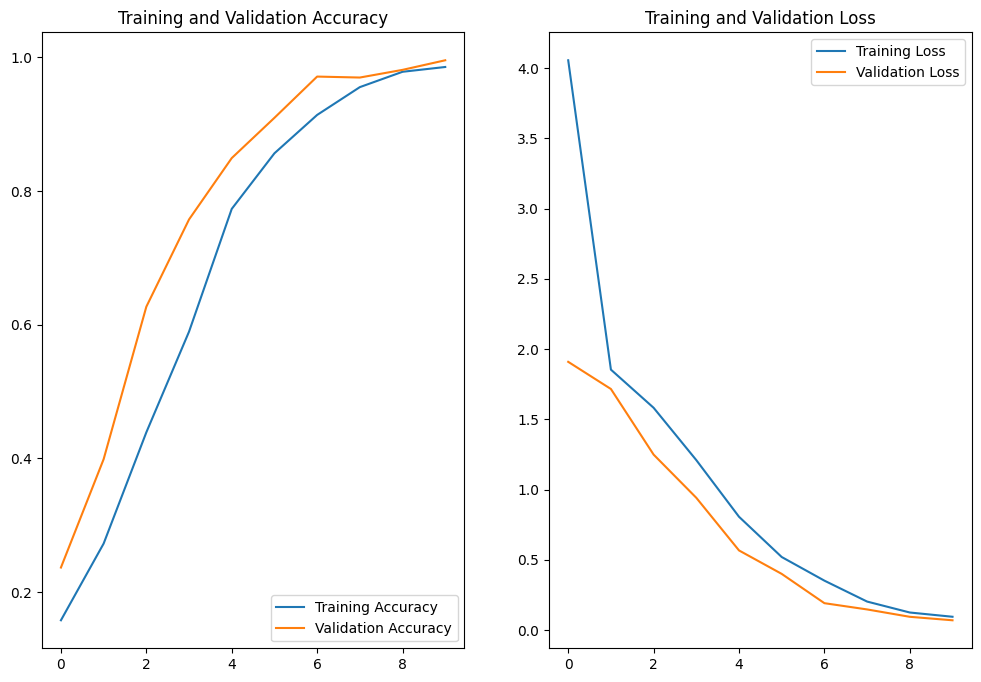

In [ ]:
# Plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save model architecture to JSON
model_json = model.to_json()
model_dir = "model_files"
os.makedirs(model_dir, exist_ok=True)
with open(os.path.join(model_dir, "model.json"), "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Save model weights to binary files
weights_dir = os.path.join(model_dir, "weights")
os.makedirs(weights_dir, exist_ok=True)

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        for j, weight in enumerate(weights):
            weight_file = os.path.join(weights_dir, f"layer_{i}_weight_{j}.bin")
            weight.astype('float32').tofile(weight_file)

In [ ]:
# Create a ZIP file
zip_filename = "model_files.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(model_dir):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), model_dir))

print("Saved model to disk and zipped the files")